### Flow Prediction for Wastwater Treatment Plant

### Feature Engineering

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [7]:
#load data from EDA
df = pd.read_csv('data/flow_pred_data.csv') 
df.set_index('date',inplace=True)
df.head()

,precip,wwtp_flow,river_flow,tmin
date,,,,
2021-05-01,0.00,15.808696,10.403750,40.0
2021-05-02,0.00,18.125000,9.950313,53.0
2021-05-03,0.21,17.750000,10.411667,52.0
2021-05-04,0.20,19.079167,35.351042,51.0
2021-05-05,0.39,16.915417,24.563542,49.0


### Setup New Features that are Forecost (for) and yesterdays value (yest)

Forecast features (new)
- Forecast Temp = tmin_for
- Forecast Precip = precip_for
- Forecast wwtp Flow = 'wwtp_flow_for' - (TARGET FOR MODEL)

Todays Feature
- temp
- precip
- wwtp_flow
- river_flow

Yesterdays features (new)
 - temp_yest
 - precip_yest
 - wwtp_flow_yest
 - river_flow_yest

In [8]:
#forecast features
df['tmin_for'] = df['tmin'].shift(-1)
df['precip_for'] = df['precip'].shift(-1)
df['wwtp_flow_for'] = df['wwtp_flow']. shift (-1)

#Yesterday Features
df['tmin_yes'] = df['tmin'].shift(1)
df['precip_yes'] = df['precip'].shift(1)
df['wwtp_flow_yes'] = df['wwtp_flow']. shift (1)
df['river_flow_yes'] = df['river_flow']. shift (1)

#drop dates on ends with Nan
df.dropna(inplace=True)
df.head()

,precip,wwtp_flow,river_flow,tmin,tmin_for,precip_for,wwtp_flow_for,tmin_yes,precip_yes,wwtp_flow_yes,river_flow_yes
date,,,,,,,,,,,
2021-05-02,0.00,18.125000,9.950313,53.0,52.0,0.21,17.750000,40.0,0.00,15.808696,10.403750
2021-05-03,0.21,17.750000,10.411667,52.0,51.0,0.20,19.079167,53.0,0.00,18.125000,9.950313
2021-05-04,0.20,19.079167,35.351042,51.0,49.0,0.39,16.915417,52.0,0.21,17.750000,10.411667
2021-05-05,0.39,16.915417,24.563542,49.0,47.0,0.00,18.175000,51.0,0.20,19.079167,35.351042
2021-05-06,0.00,18.175000,17.362500,47.0,43.0,0.00,18.495833,49.0,0.39,16.915417,24.563542


### Divide Precipitaiton into features for Rain and Snow Dependent on Min Temp
- Precip as rain = precip when tmin > 32F
- Precip as snow = precip when tmin <= 32F

In [9]:
# Make features for precip as rain when temp > 32F and snow when tmep <= 32F
df['precip_rain']= df['precip'].loc[df['tmin'] >32] #precip above 32F is rain
df['precip_rain'] = df['precip_rain'].replace(np.nan, 0) # remove null values in new column
df['precip_snow']= df['precip'].loc[df['tmin'] <=32] #precip below 32 is snow
df['precip_snow'] = df['precip_snow'].replace(np.nan, 0) # remove null values in new column

df['precip_rain_for']= df['precip_for'].loc[df['tmin_for'] >32] #precip above 32F is rain
df['precip_rain_for'] = df['precip_rain_for'].replace(np.nan, 0) # remove null values in new column
df['precip_snow_for']= df['precip_for'].loc[df['tmin_for'] <=32] #precip below 32 is snow
df['precip_snow_for'] = df['precip_snow_for'].replace(np.nan, 0) # remove null values in new column

df['precip_rain_yes']= df['precip_yes'].loc[df['tmin_for'] >32] #precip above 32F is rain
df['precip_rain_yes'] = df['precip_rain_yes'].replace(np.nan, 0) # remove null values in new column
df['precip_snow_yes']= df['precip_yes'].loc[df['tmin_for'] <=32] #precip below 32 is snow
df['precip_snow_yes'] = df['precip_snow_yes'].replace(np.nan, 0) # remove null values in new column
df.drop(columns = {'precip','precip_for','precip_yes'}, inplace=True)

df.head()

,wwtp_flow,river_flow,tmin,tmin_for,wwtp_flow_for,tmin_yes,wwtp_flow_yes,river_flow_yes,precip_rain,precip_snow,precip_rain_for,precip_snow_for,precip_rain_yes,precip_snow_yes
date,,,,,,,,,,,,,,
2021-05-02,18.125000,9.950313,53.0,52.0,17.750000,40.0,15.808696,10.403750,0.00,0.0,0.21,0.0,0.00,0.0
2021-05-03,17.750000,10.411667,52.0,51.0,19.079167,53.0,18.125000,9.950313,0.21,0.0,0.20,0.0,0.00,0.0
2021-05-04,19.079167,35.351042,51.0,49.0,16.915417,52.0,17.750000,10.411667,0.20,0.0,0.39,0.0,0.21,0.0
2021-05-05,16.915417,24.563542,49.0,47.0,18.175000,51.0,19.079167,35.351042,0.39,0.0,0.00,0.0,0.20,0.0
2021-05-06,18.175000,17.362500,47.0,43.0,18.495833,49.0,16.915417,24.563542,0.00,0.0,0.00,0.0,0.39,0.0


<Axes: >

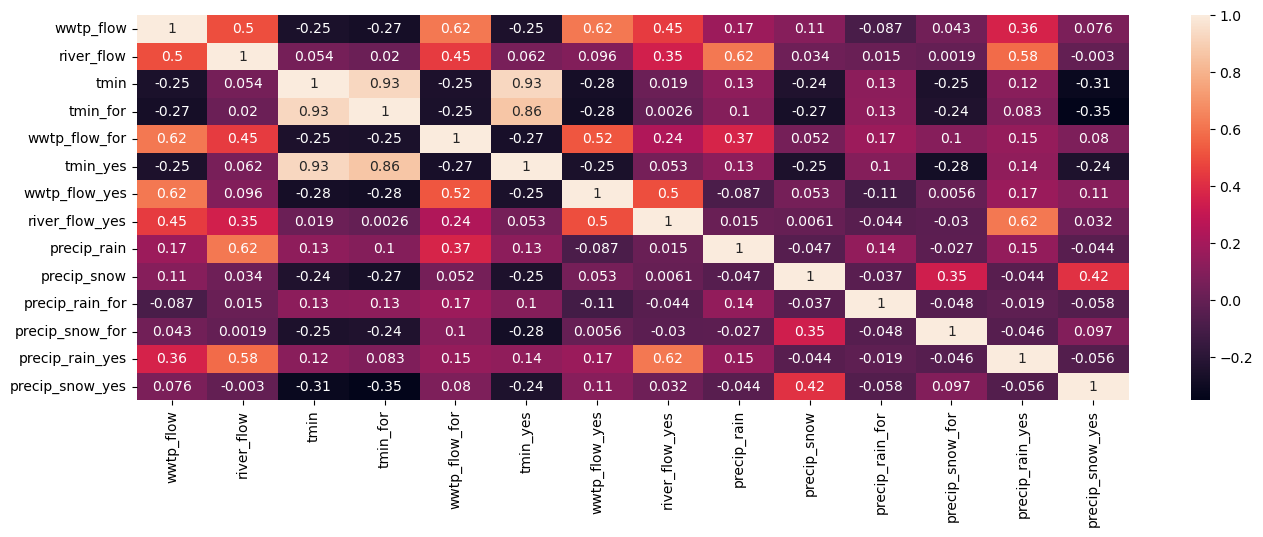

In [12]:
df_corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(data  = df_corr, annot = True)

In [13]:
#Save data to file for next steps
df.to_csv("data/flow_pred_feature.csv", encoding='utf-8')